In [1]:
import pandas as pd

# Load datasets
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [2]:
# Merge customers and transactions
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

In [3]:
# Group by CustomerID and aggregate features
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionID': 'count',  # Number of transactions
    'Region': 'first'  # Region of the customer
}).reset_index()

In [4]:
# One-hot encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
customer_features[['TotalValue', 'Quantity', 'TransactionID']] = scaler.fit_transform(
    customer_features[['TotalValue', 'Quantity', 'TransactionID']]
)

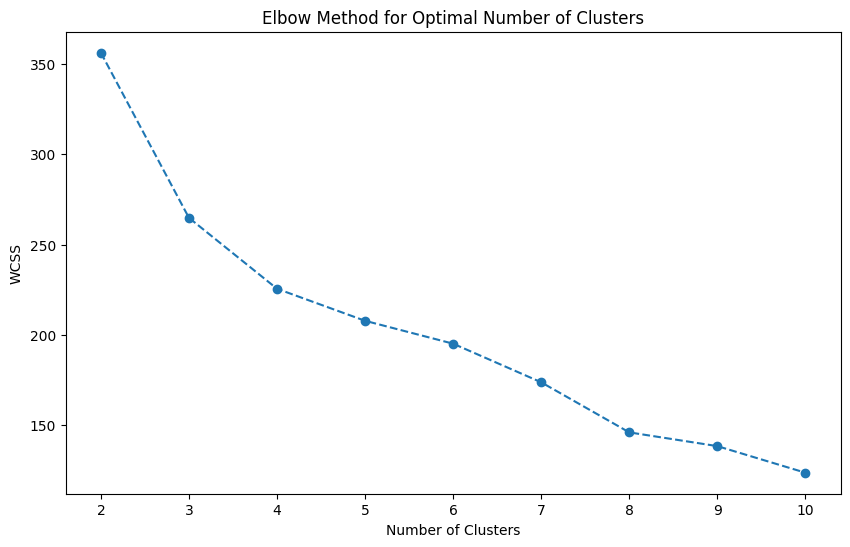

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(2, 11):  # Test 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_features.iloc[:, 1:])  # Exclude CustomerID
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features.iloc[:, 1:])  # Exclude CustomerID

In [8]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features.iloc[:, 1:-1], customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.306315421417168


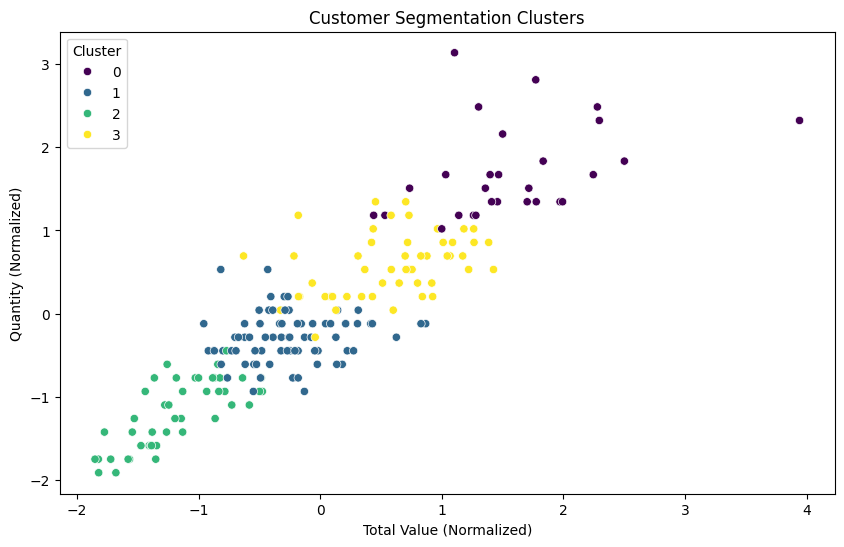

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_features, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value (Normalized)')
plt.ylabel('Quantity (Normalized)')
plt.show()

C:\Users\Rohit\AppData\Local\Temp\ipykernel_19632\1601880330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_features, palette='viridis')


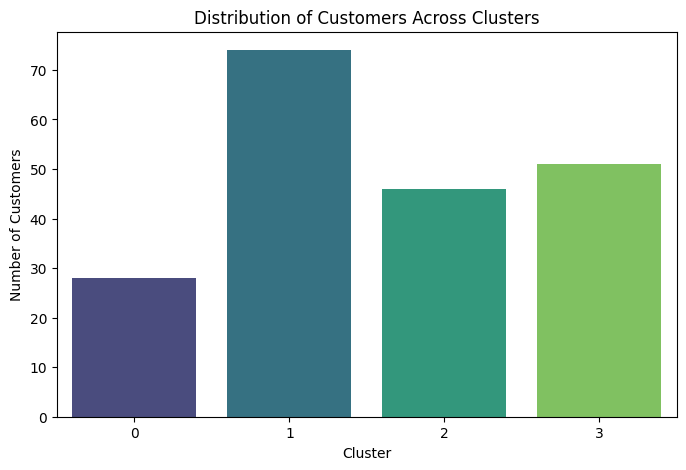

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=customer_features, palette='viridis')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(customer_features.iloc[:, 1:-1], customer_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23682403624632775
